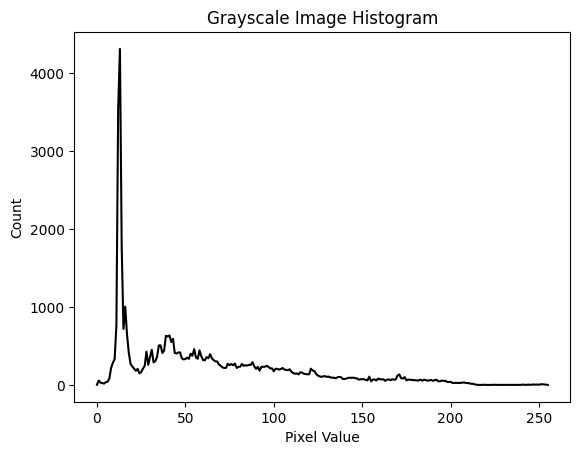

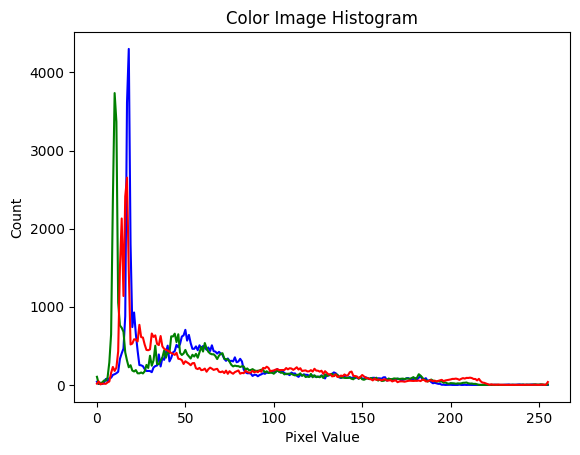

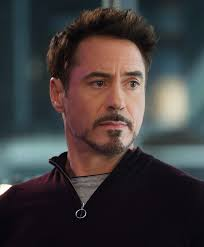

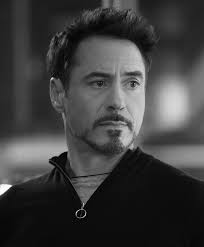

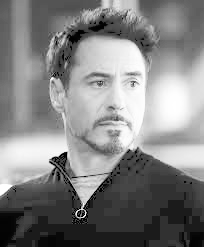

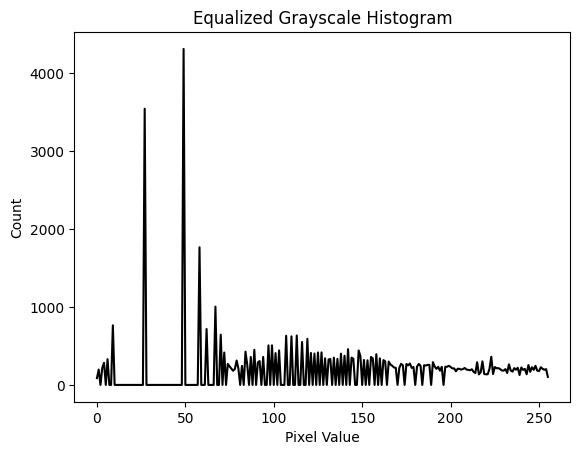

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def plot_histogram(image, title, color=('b', 'g', 'r')):
    plt.figure()
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Count")

    if len(image.shape) == 2:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='black')
    else:
        for i, col in enumerate(color):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)

    plt.show()

image = cv2.imread('/content/ts1.jpeg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plot_histogram(gray_image, "Grayscale Image Histogram")
plot_histogram(image, "Color Image Histogram")

equalized_gray = cv2.equalizeHist(gray_image)
cv2_imshow(image)
cv2_imshow(gray_image)
cv2_imshow(equalized_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

plot_histogram(equalized_gray, "Equalized Grayscale Histogram")

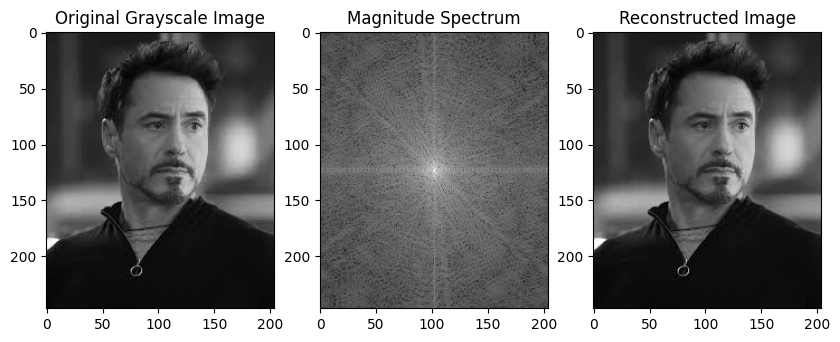

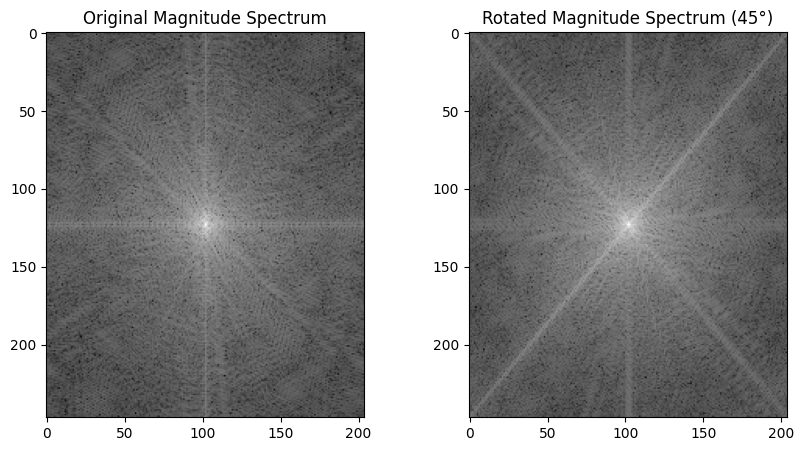

In [8]:
def fourier_transform(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift))
    return dft_shift, magnitude_spectrum

dft_shift, magnitude_spectrum = fourier_transform(gray_image)

idft_shift = np.fft.ifftshift(dft_shift)
reconstructed_image = np.fft.ifft2(idft_shift)
reconstructed_image = np.abs(reconstructed_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.show()

angle = 45
(h, w) = gray_image.shape
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(gray_image, rotation_matrix, (w, h))
_, rotated_magnitude_spectrum = fourier_transform(rotated_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Original Magnitude Spectrum')
plt.subplot(1, 2, 2)
plt.imshow(rotated_magnitude_spectrum, cmap='gray')
plt.title(f'Rotated Magnitude Spectrum ({angle}°)')
plt.show()